In [3]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics
import seaborn as sns

ImportError: cannot import name 'SequentialFeatureSelector' from 'sklearn.feature_selection' (/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/__init__.py)

In [2]:
df = pd.read_csv('../Data/BaseData.csv')

In [3]:
df.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Unnamed: 0.1,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Lasso
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1,909176150,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,119703.199217
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,2,905476230,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,117288.214611
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,3,911128020,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,131483.009302


In [4]:
X_ordinal = df.drop(['SalePrice'], axis=1).values
Y_ordinal = df.SalePrice.values

In [5]:
X_ordinal.shape

(2580, 83)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_ordinal,Y_ordinal,test_size=0.25)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
gbm = GradientBoostingRegressor()
gbm.fit(X_train_scaled, Y_train)
GBM_Score = gbm.score(X_test_scaled, Y_test)

In [7]:
GBM_Score

0.9410151971678108

In [8]:
gbm.feature_importances_

array([1.53416517e-03, 4.82868999e-05, 1.87077893e-05, 2.40017046e-05,
       2.17692304e-05, 2.80176095e-04, 1.70135726e-03, 0.00000000e+00,
       5.15036209e-05, 2.13348666e-05, 1.37286701e-04, 0.00000000e+00,
       2.67748389e-03, 0.00000000e+00, 1.50864446e-04, 0.00000000e+00,
       4.06103700e-04, 3.25013081e-05, 6.59073760e-05, 6.60475299e-05,
       1.05791123e-04, 1.92332242e-06, 0.00000000e+00, 2.00299973e-04,
       0.00000000e+00, 7.36268413e-06, 1.46114040e-04, 2.38387806e-05,
       0.00000000e+00, 3.24958282e-05, 7.81616502e-05, 6.03396544e-06,
       1.46926137e-05, 3.27093538e-07, 2.41465557e-04, 3.67181348e-04,
       0.00000000e+00, 2.90818704e-04, 0.00000000e+00, 1.94776810e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.53840924e-04,
       7.08106187e-06, 2.99459112e-05, 1.93238658e-04, 3.83355020e-04,
       8.58264763e-04, 2.16341276e-03, 2.36986628e-04, 1.53179374e-03,
       2.15962991e-03, 1.47480536e-03, 8.69411621e-04, 3.36140275e-04,
      

In [9]:
X_cols = df.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('Lasso', 0.9671036385189818),
 ('BsmtFinSF1', 0.004289836022675345),
 ('Condition2', 0.0026774838895599136),
 ('GrLivArea', 0.002163412761317892),
 ('OverallQual', 0.0021596299079403632),
 ('LandContour', 0.0017013572584580346),
 ('TotalBsmtSF', 0.0015911916320995947),
 ('2ndFlrSF', 0.001538574260347066),
 ('Unnamed: 0', 0.0015341651718455912),
 ('LotArea', 0.0015317937388444516),
 ('OverallCond', 0.0014748053587737044),
 ('MasVnrArea', 0.0012400226516916034),
 ('YearBuilt', 0.0008694116208210658),
 ('PID', 0.0008582647627584844),
 ('1stFlrSF', 0.0006842105089630303),
 ('GarageArea', 0.0006763165777720603),
 ('OpenPorchSF', 0.0006718218812454202),
 ('FullBath', 0.0005405737896849506),
 ('MoSold', 0.00045384092442404686),
 ('Fireplaces', 0.00044998619538065554),
 ('RoofMatl', 0.0004061036996493486),
 ('Unnamed: 0.1', 0.00038335501976992365),
 ('GarageType', 0.0003671813479766298),
 ('YearRemodAdd', 0.00033614027529393464),
 ('BsmtUnfSF', 0.0003248127584289529),
 ('GarageQual', 0.00029

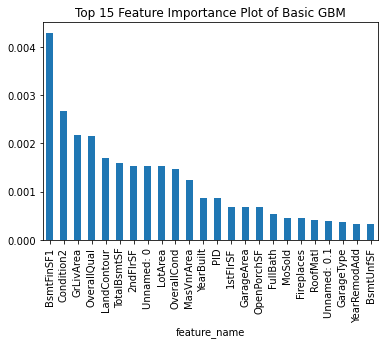

In [10]:
a, b = zip(*sorted_importance[1:25]) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Top 15 Feature Importance Plot of Basic GBM');

In [11]:
X_ordinal_scaled = scaler.transform(X_ordinal)
len(X_ordinal_scaled)

2580

In [12]:
predicted_value = gbm.predict(X_ordinal_scaled)

In [13]:
true_value = Y_ordinal

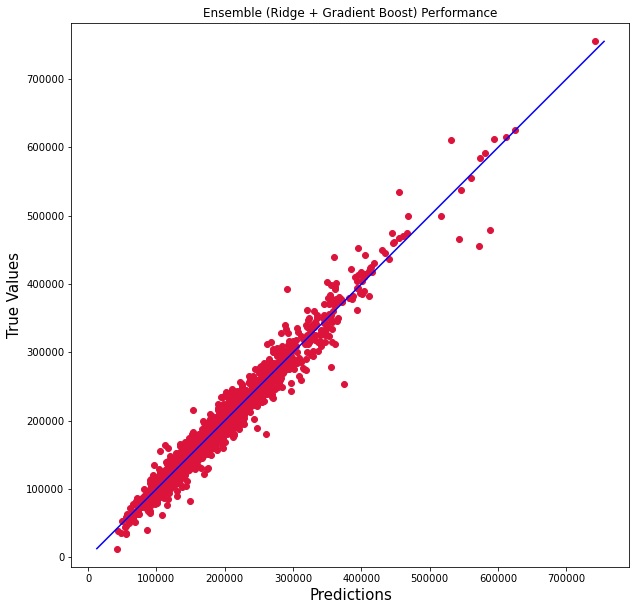

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(predicted_value, true_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

plt.title('Ensemble (Ridge + Gradient Boost) Performance')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()